In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#importing data
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500

n_classes = 10
batch_size = 100 # batches of features feed to network

x = tf.placeholder('float', [None, 784])
y = tf.placeholder('float')

In [4]:
def neural_network_model(data):
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([784, n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}

    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                    'biases':tf.Variable(tf.random_normal([n_classes])),}

 	# (input_data * weights) + biases

    l1 = tf.add(tf.matmul(data,hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)

    output = tf.matmul(l3,output_layer['weights']) + output_layer['biases']

    return output

In [11]:
def train_neural_network(x):
    prediction = neural_network_model(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(prediction,y) )
    # optimizer has a default parameter- learning rate = 0.01
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    hm_epochs = 10 #cycles feedforward+backward
    train = []
    valid = []
    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())
        
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))

        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(int(mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
                epoch_loss += c
            
            train_accu = accuracy.eval({x:mnist.train.images, y:mnist.train.labels})
            valid_accu = accuracy.eval({x:mnist.validation.images, y:mnist.validation.labels})
            train += [train_accu]
            valid += [valid_accu]
            print ('Epoch', epoch+1,'loss:',epoch_loss,'train_accu:',train_accu,'valid_accu:',valid_accu)
            
        plt.figure()
        plt.plot(np.arange(len(train)),train,'r',valid,'b')
        plt.legend(['train','valid'])
        test_acc = accuracy.eval({x:mnist.test.images, y:mnist.test.labels})
        print('test_acc:',test_acc)

Epoch 1 loss: 1782991.99857 train_accu: 0.910909 valid_accu: 0.895
Epoch 2 loss: 387237.102198 train_accu: 0.9436 valid_accu: 0.9204
Epoch 3 loss: 205969.695225 train_accu: 0.957818 valid_accu: 0.9286
Epoch 4 loss: 122836.49027 train_accu: 0.971255 valid_accu: 0.9366
Epoch 5 loss: 71987.8140749 train_accu: 0.976982 valid_accu: 0.9348
Epoch 6 loss: 43893.6855821 train_accu: 0.985455 valid_accu: 0.9446
Epoch 7 loss: 28051.3381188 train_accu: 0.981673 valid_accu: 0.939
Epoch 8 loss: 23738.0810952 train_accu: 0.988927 valid_accu: 0.9486
Epoch 9 loss: 17739.3682735 train_accu: 0.989709 valid_accu: 0.9504
Epoch 10 loss: 17238.0070875 train_accu: 0.992491 valid_accu: 0.953
test_acc: 0.9501


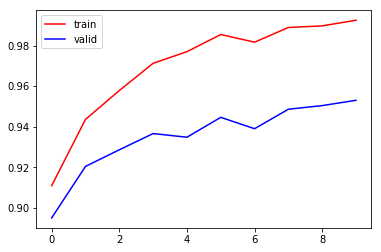

In [12]:
train_neural_network(x)